# Comunicación efectiva

## 1. Utilizar la librería `ggplot` o su equivalente `plotnine` para presentar datos de mortalidad en Gran Canaria. Se deben elegir adecuadamente las escalas, presentar gráficos variados y que contrasten la situación en varias regiones de la isla. Bien por municipios o por comarcas, por ejemplo: Norte, Las Palmas, Sur, Centro, etc.

### Datos de mortalidad

Lo primero que debemos hacer es importar las librerías a utilizar y leer el conjunto de datos de defunciones de Gran Canaria.

In [1]:
import pandas as pd
import geopandas as gp
from plotnine import *

df = pd.read_csv('../data/defStatTasas.csv').drop(labels = 'Unnamed: 0', axis = 'columns')

display(df)

,Municipio,Año,Sexo,Tipo,Defunciones
0,Agaete,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"0,00"
1,Agüimes,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"24,72"
2,Artenara,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"0,00"
3,Arucas,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"26,17"
4,Firgas,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,"26,22"
...,...,...,...,...,...
3187,Telde,2018,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"11,51"
3188,Teror,2018,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"0,00"
3189,Valsequillo,2018,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"0,00"
3190,Valleseco,2018,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,"111,23"


Como primer preprocesado eliminaremos los espacios sobrantes en los nombres de municipio.

In [2]:
df['Municipio'] = df['Municipio'].str.strip()

Este conjunto de datos contiene el campo `Defunciones` expresado incorrectamente, pues aparece como objeto (`Object`) en vez de como valor numérico (`float64`). Esto se debe a que se encuentra mal formateado por los siguientes motivos:

* El punto decimal (`"."`) ha sido expresado con una coma decimal (`","`).
* Existen ciertos registros con valores indeterminados (`"...."` o `"."`).
    * `"...."` aparece en registros con defunciones desconocidas.
    * `"."` aparece en registros con defunciones que no se pueden dar, como puedan ser hombres embarazados.

Previo a la graficación de la información, debemos preprocesar estos datos para corregir estos valores incorrectos y convertir la columna `Defunciones` en una columna numérica.

In [3]:
# Sustituimos las comas decimales por puntos decimales
df['Defunciones'] = df['Defunciones'].str.replace(',', '.')

# Sustituimos cualquier secuencia de puntos sospechosa por la cadena '0'
df['Defunciones'] = df['Defunciones'].str.replace(pat = r"^\.+$", repl = '0', regex = True)

# Convertimos la columna a numérica
df['Defunciones'] = pd.to_numeric(df['Defunciones'])

In [4]:
display(df['Defunciones'].dtype)

dtype('float64')

Antes de continuar, condensaremos la información del conjunto de datos según su Municipio, Año y Número de defunciones, para posteriormente poder graficar la información más cómodamente.

In [5]:
df = df.groupby(['Municipio', 'Año']).agg({'Defunciones': 'sum'}).reset_index()

In [6]:
display(df)

,Municipio,Año,Defunciones
0,Agaete,2018,1863.87
1,Agaete,2019,2074.01
2,Agaete,2020,1700.22
3,Agaete,2021,2011.79
4,Agüimes,2018,1056.28
...,...,...,...
79,Valsequillo,2021,1399.02
80,Vega de San Mateo,2018,1686.35
81,Vega de San Mateo,2019,1895.73
82,Vega de San Mateo,2020,1864.44


### Datos geográficos

Comenzamos leyendo el fichero de ubicaciones geográficas de canarias para mostrar posteriormente mapas ilustrados de las islas.

In [7]:
canary_islands = gp.read_file('../data/indicadores_poblacion_municipios.geojson').filter(
    items = [
        'indicadores_municipal_MUNICIPIO',
        'label',
        'indicadores_municipal_CUISLA',
        'geometry'
    ],
    axis = 'columns'
)

display(canary_islands)

,indicadores_municipal_MUNICIPIO,label,indicadores_municipal_CUISLA,geometry
0,Yaiza,Yaiza,ES708,"MULTIPOLYGON (((-13.69457 28.98678, -13.69850 ..."
1,T�as,Tías,ES708,"MULTIPOLYGON (((-13.70047 28.91793, -13.70089 ..."
2,Santa Cruz de Tenerife,Santa Cruz de Tenerife,ES709,"MULTIPOLYGON (((-16.27476 28.57259, -16.27444 ..."
3,Valverde,Valverde,ES703,"MULTIPOLYGON (((-17.96079 27.69245, -17.96750 ..."
4,Artenara,Artenara,ES705,"MULTIPOLYGON (((-15.74959 27.98801, -15.75005 ..."
...,...,...,...,...
83,San Sebasti�n de la Gomera,San Sebastián de La Gomera,ES706,"MULTIPOLYGON (((-17.19498 28.02910, -17.19870 ..."
84,Santa Cruz de la Palma,Santa Cruz de La Palma,ES707,"MULTIPOLYGON (((-17.75216 28.70539, -17.75264 ..."
85,Puerto del Rosario,Puerto del Rosario,ES704,"MULTIPOLYGON (((-13.82862 28.56373, -13.82939 ..."
86,San Crist�bal de La Laguna,San Cristóbal de La Laguna,ES709,"MULTIPOLYGON (((-16.41127 28.52665, -16.41105 ..."


En este ejercicio solo nos interesa analizar la isla de Gran Canaria, por lo que filtraremos todas aquellas entradas del _DataFrame_ anterior que pertenezcan a dicha isla. Esto lo conseguiremos filtrando su código de región según el estándar [NUTS3](http://nuts.geovocab.org/id/nuts3.html).

Dentro de este estándar, el código de la isla de Gran Canaria es el `ES705`.

In [8]:
# http://nuts.geovocab.org/id/nuts3.html
cuisla_dictionary = {
    'el_hierro':        'ES703',
    'fuerteventura':    'ES704',
    'gran_canaria' :    'ES705',
    'la_gomera':        'ES706',
    'la_palma':         'ES707',
    'lanzarote':        'ES708',
    'tenerife':         'ES709',
}

In [9]:
gc_code = cuisla_dictionary['gran_canaria']

gc_data = canary_islands.query(f'indicadores_municipal_CUISLA == "{gc_code}"')

In [10]:
display(gc_data)

,indicadores_municipal_MUNICIPIO,label,indicadores_municipal_CUISLA,geometry
4,Artenara,Artenara,ES705,"MULTIPOLYGON (((-15.74959 27.98801, -15.75005 ..."
6,Agaete,Agaete,ES705,"MULTIPOLYGON (((-15.74604 28.05081, -15.74522 ..."
11,Tejeda,Tejeda,ES705,"MULTIPOLYGON (((-15.66329 27.91209, -15.66464 ..."
12,Valleseco,Valleseco,ES705,"MULTIPOLYGON (((-15.56917 28.02614, -15.57042 ..."
18,Palmas de Gran Canaria (Las),Las Palmas de Gran Canaria,ES705,"MULTIPOLYGON (((-15.39473 28.03147, -15.39708 ..."
19,San Bartolom� de Tirajana,San Bartolomé de Tirajana,ES705,"MULTIPOLYGON (((-15.67899 27.75623, -15.67819 ..."
29,Ag�imes,Agüimes,ES705,"MULTIPOLYGON (((-15.40839 27.84837, -15.40836 ..."
32,Santa Br�gida,Santa Brígida,ES705,"MULTIPOLYGON (((-15.50301 28.01347, -15.50362 ..."
34,Firgas,Firgas,ES705,"MULTIPOLYGON (((-15.55621 28.07825, -15.55696 ..."
37,Ingenio,Ingenio,ES705,"MULTIPOLYGON (((-15.38702 27.90252, -15.38934 ..."


A continuación unimos ambas tablas para que cada municipio tenga asociada su geometría para poder graficar. Esto se consigue realizando una unión (_merge_) entre los DataFrames `gc_data` y `df` de la siguiente manera:

```mermaid
graph LR
    A[(gc_data)]
    B[(df)]

    C[Left Join]

    D[(summarized_df)]

    A -->|indicadores_municipal_MUNICIPIO| C
    B -->|Municipio| C
    C --> D
```

Sin embargo, los valores de la columna `indicadores_municipal_MUNICIPIO` están incorrectamente formateados, puesto que las tildes y acentos (Ej. la "ü" de "Agüimes" o la "é" de "Bartolomé") han sido sustituidos por caracteres de fallo.

Para corregir esto, sustituiremos sus valores por los valores correctos correspondientes de la columna `Municipio` del conjunto de datos de defunciones, utilizando el siguiente fragmento de código:

In [11]:
# Ordenamos las entradas por su indicador de municipio
gc_data = gc_data.sort_values(by = 'indicadores_municipal_MUNICIPIO')

# Asignamos los valores correctos del dataframe 'df' tras haberlas ordenado
# también por 'Municipio'
gc_data['indicadores_municipal_MUNICIPIO'] = df.sort_values(by = 'Municipio')['Municipio'].unique()

Posteriormente unimos ambos conjuntos de datos en un DataFrame `summarized_df`:

In [12]:
summarized_df = gc_data.merge(df, how = 'left', left_on = 'indicadores_municipal_MUNICIPIO', right_on = 'Municipio').filter([
    'indicadores_municipal_MUNICIPIO',
    'label',
    'indicadores_municipal_CUISLA',
    'Año',
    'Defunciones',
    'geometry'
])

Por último, realizamos un gráfico por cada uno de los posibles años disponibles.

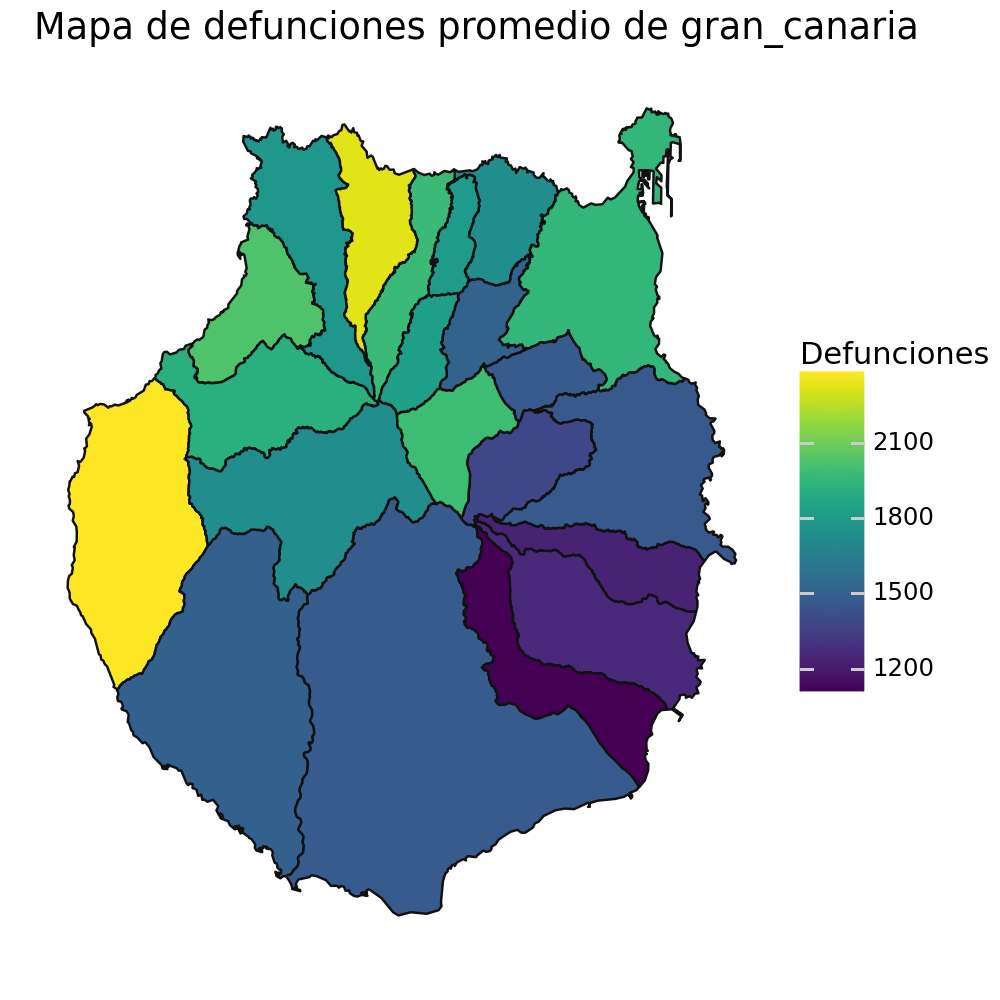

<Figure Size: (500 x 500)>

In [13]:
ISLAND = 'gran_canaria'

(ggplot()
    + geom_map(summarized_df.query(f'indicadores_municipal_CUISLA=="{cuisla_dictionary[ISLAND]}" & Año==2021'), aes(fill='Defunciones'))
    + labs(title = f'Mapa de defunciones promedio de {ISLAND}')
    + theme(
        figure_size = (5, 5),
        panel_background = element_rect(fill = 'white'),
        axis_text_x = element_blank(),
        axis_text_y = element_blank(),
        axis_ticks_major_x = element_blank(),
        axis_ticks_major_y = element_blank()
    )
)

## 2. Realizar una historia similar por islas